# IAO (1996), Practical tour 
Paper with a drown circle and table of maximal elongations of Mercury and Venus had been done
for participants.
1. The figure show a circle, that is the orbit of Earth. By using data from the table, draw orbits of
Mercury and Venus.
2. Estimate radii of the orbits (in a.u.).

(https://astroarena.github.io/astroarena/olympiads/iao/1996/problems/PR_problem_1996.pdf)


### Table: Greatest Elongations of Mercury and Venus.
\begin{array}{cc}
\text{ Mercury: 1989-1990 }& \text{ Venus: 1983-1990 } \\
{\begin{array}{|c|c|c|}
\hline \text{Date} & \text{East} & \text{West} \\
\hline \text{8 Jan 89 } &   19^{\circ} & \\
\hline \text{18 Feb 89} & & 26^{\circ} \\
\hline \text{30 Apr 89} &   21^{\circ} & \\
\hline \text{18 Jun 89} & & 23^{\circ} \\
\hline \text{28 Aug 89} &   27^{\circ} & \\
\hline \text{10 Oct 89} & & 18^{\circ} \\
\hline \text{22 Dec 89} &   20^{\circ} & \\
\hline \text{1 Feb 90 } & & 25^{\circ} \\
\hline \text{13 Apr 90} &   20^{\circ} & \\
\hline \text{31 Мау 90} & & 25^{\circ} \\
\hline \text{11 Aug 90} &   27^{\circ} &   \\
\hline \text{24 Sep 90} & & 18^{\circ}   \\
\hline \text{5 Dec 90 } &   21^{\circ} &   \\
\hline
\end{array}} &
{\begin{array}{|c|c|c|}
\hline \text{Date} & \text{East} & \text{West} \\
\hline \text{15 Jun 83} &  45^{\circ} & \\
\hline \text{4 Nov 83 }& & 47^{\circ} \\
\hline \text{21 Jan 85} &  47^{\circ} & \\
\hline \text{12 Jun 85} & &46^{\circ} \\
\hline \text{26 Aug 86} &  46^{\circ} & \\
\hline \text{15 Jan 87} & &47^{\circ} \\
\hline \text{2 Apr 88 }&   46^{\circ} & \\
\hline \text{22 Aug 88} & &46^{\circ} \\
\hline \text{8 Nov 89 }&   47^{\circ} & \\
\hline \text{30 Mar 90} && 46^{\circ} \\
\hline \\
\hline \\
\hline \\
\hline
\end{array}}\\
\end{array}


In [1]:
table_mer = '''
Mercury: 1989-1990    East    West
08 Jan 89    19	
18 Feb 89        26
30 Apr 89    21	
18 Jun 89        23
28 Aug 89    27	
10 Oct 89        18
22 Dec 89    20	
01 Feb 90        25
13 Apr 90    20	
31 Мау 90        25	
11 Aug 90    27			
24 Sep 90        18		
05 Dec 90    21	
'''
table_ven='''
    Venus: 1983-1990    East    West 
15 Jun 83    45
4 Nov 83         47
21 Jan 85    47
12 Jun 85        46
26 Aug 86    46
15 Jan 87        47
2 Apr 88     46
22 Aug 88        46
8 Nov 89     47
30 Mar 90        46
'''

In [3]:
from io import StringIO as sio
import pandas as pd
data_mer = pd.read_csv(sio(table_mer), delimiter='    ',comment='\t', parse_dates=True, dayfirst=True)
data_ven = pd.read_csv(sio(table_ven), delimiter='    ',comment='\t')

ModuleNotFoundError: No module named 'pandas'

In [3]:
data_mer.values
# help(pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt

def date_parser(str_array):
    mon = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'Мау':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    dates=[]
    for str in str_array:
        d, m, y = str.split()
        dates.append((float(d)-1)/365 + (mon[m]-1)/12+float(y))
    return dates

data_mer['Date'] = date_parser(data_mer['Mercury: 1989-1990'].values)
data_ven['Date'] = date_parser(data_ven['Venus: 1983-1990'].values)

def d_to_p(x, y):
    '''
    Conversion from cartesian to polar coordinates
    Parameters
    ----------
    x: np.array
    y: np.array

    Returns
    -------
    r: np.array
    phi: np.array
    '''
    r = np.sqrt(x**2+y**2)
    phi = np.atan2(y, x)
    return (r, phi)
def p_to_d(r, phi):
    y = r*np.sin(phi)
    x = r*np.cos(phi) 
    return(x, y)

In [4]:
import numpy as np

# Что мы хотим сделать:
we have a date -> coordinates of the Earth in orbit -> relative to the direction of the sun, put the ray towards the planet -> select a point on the ray such that the angle "Earth"-"planet"-"Sun" = 90 degrees and we need its coordinates: we know the coordinates of two points in a triangle (one of which is at (0,0)) and the triangle itself, we need to find the third point: from the hypotenuse and angle we find the length of the catheter (r_mer), and from the angle at the Sun we find the orientation (phi_mer)

$$(x_\oplus, y_\oplus) = p to d(1, (Date - int(Date))*2 pi)$$

In [5]:
def find_planet(data_mer):
    data_mer['phi_0'] = (data_mer['Date'].values - (data_mer['Date'].values.astype(int)))*2*np.pi
    data_mer['x_0'], data_mer['y_0'] = p_to_d(1, data_mer['phi_0'].values)
    elon_mer =  (np.nan_to_num(data_mer['East'].values) - np.nan_to_num(data_mer['West'].values))/180*np.pi
    r_mer = np.sin(elon_mer)
    phi_mer = data_mer['phi_0'].values - np.pi + elon_mer
    data_mer['x'], data_mer['y'] = p_to_d(r_mer, phi_mer)
    return data_mer

data_mer = find_planet(data_mer)
data_ven = find_planet(data_ven)



data_ven

,Venus: 1983-1990,East,West,Date,phi_0,x_0,y_0,x,y
0,15 Jun 83,45.0,NaN,83.455023,2.858993,-0.960334,0.278853,0.619594,0.340740
1,4 Nov 83,NaN,47.0,83.841553,5.287630,0.544037,-0.839061,-0.177439,-0.709502
2,21 Jan 85,47.0,NaN,85.054795,0.344284,0.941317,0.337523,-0.288979,-0.671841
3,12 Jun 85,NaN,46.0,85.446804,2.807350,-0.944659,0.328054,-0.302291,0.652741
4,26 Aug 86,46.0,NaN,86.651826,4.095547,-0.578462,-0.815709,-0.133033,0.706931
5,15 Jan 87,NaN,47.0,87.038356,0.240999,0.971100,0.238673,0.612028,-0.400375
6,2 Apr 88,46.0,NaN,88.252740,1.588011,-0.017213,0.999852,0.525975,-0.490714
7,22 Aug 88,NaN,46.0,88.640868,4.026690,-0.633214,-0.773976,-0.716908,-0.059096
8,8 Nov 89,47.0,NaN,89.852511,5.356487,0.600478,-0.799642,-0.727218,0.077664
9,30 Mar 90,NaN,46.0,90.246119,1.546410,0.024384,0.999703,0.529481,0.486929


10
11
12


/tmp/ipykernel_498975/1573126238.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0].squeeze()


(-1.0, 1.0, -1.0, 1.0)

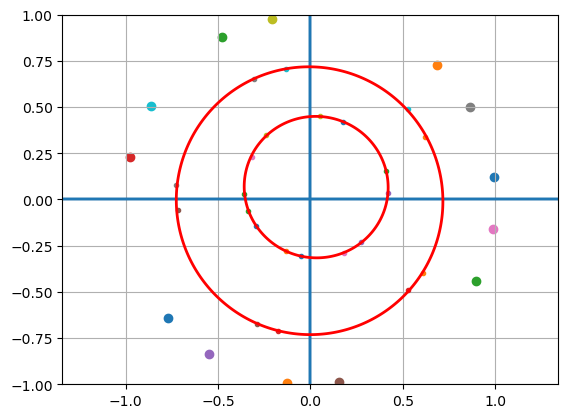

In [29]:
fig = plt.figure()
for i in np.arange(len(data_mer)):
    plt.scatter(data_mer['x_0'][i], data_mer['y_0'][i])
    plt.plot(data_mer['x'][i], data_mer['y'][i],'.')
    try:
        plt.plot(data_ven['x'][i], data_ven['y'][i],'.')
    except Exception as E:
        print(E)
    # plt.text(data_mer['x_0'][i], data_mer['y_0'][i],  data_mer['Mercury: 1989-1990'][i])
    plt.axhline(0)
    plt.axvline(0)
def plot_planet(data_mer):
    X, Y = data_mer['x'].values, data_mer['y'].values
    X, Y = X.reshape(X.shape[0], 1), Y.reshape(Y.shape[0], 1)
    A = np.hstack([X**2, X * Y, Y**2, X, Y])
    b = np.ones_like(X)
    x = np.linalg.lstsq(A, b)[0].squeeze()
    x_coord = np.linspace(-1,1,300)
    y_coord = np.linspace(-1,1,300)
    X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
    Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
    plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)

plot_planet(data_mer)
plot_planet(data_ven)
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)
# c((0,0), 1)
plt.axis('equal')


In [ ]:
help(plt.text)

In [27]:
from matplotlib.patches import Circle as c
help(c)

Help on class Circle in module matplotlib.patches:

class Circle(Ellipse)
 |  Circle(xy, radius=5, **kwargs)
 |  
 |  A circle patch.
 |  
 |  Method resolution order:
 |      Circle
 |      Ellipse
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, radius=5, **kwargs)
 |      Create a true circle at center *xy* = (*x*, *y*) with given *radius*.
 |      
 |      Unlike `CirclePolygon` which is a polygonal approximation, this uses
 |      Bezier splines and is much closer to a scale-free circle.
 |      
 |      Valid keyword arguments are:
 |      
 |      Properties:
 |          agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
 |          alpha: unknown
 |          animated: bool
 |          antialiased or aa: bool or None
 |          capstyle: `.CapStyle` or {'butt', 'projecting', 'roun

In [9]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 5
beta = 3
N = 500
DIM = 2

np.random.seed(2)

# Generate random points on the unit circle by sampling uniform angles
theta = np.random.uniform(0, 2*np.pi, (N,1))
eps_noise = 0.2 * np.random.normal(size=[N,1])
circle = np.hstack([np.cos(theta), np.sin(theta)])

# Stretch and rotate circle to an ellipse with random linear tranformation
B = np.random.randint(-3, 3, (DIM, DIM))
noisy_ellipse = circle.dot(B) + eps_noise

# Extract x coords and y coords of the ellipse as column vectors
X = noisy_ellipse[:,0:1]
Y = noisy_ellipse[:,1:]


In [11]:
X.shape

(500, 1)

In [ ]:
job2 = np.array([0.0, 8.7, 24.6, 50.7, 75.4, 89.9])
emp2 = np.array([0.0, 0.0, 1.4, 5.8, 10.1, 10.1])
f2 = 0.9
"last 9 min"
(89.9-75.4)*25/9+75.4

In [ ]:
import numpy as np
'checked, %:'  
job = np.array([0, 7.9, 20.6, 38.1, 55.6, 72.2, 77.0])
'Empty, %' 
emp = np.array([0, 1.26, 9.5, 13.5, 16.7, 22.2, 23.0])
f = 0.3
'last 5 min '
y = np.append(0., (job-emp*f)[1:]-(job-emp*f)[:-1])
x = np.append(0., np.arange(0,3, 0.5)+0.25)
import matplotlib.pyplot as plt
plt.plot(x[:-1],y[:-1]*2)
plt.xlabel("Time, ч.")
plt.ylabel('% per hour')
y2 = np.append(0., (job2-emp2*f2)[1:]-(job2-emp2*f2)[:-1])
x2 = np.append(0., np.arange(0,2.5, 0.5)+0.25)
plt.plot(x2[:-1], y2[:-1]*2)
# plt.plot(x[:],y[:]*2)


In [ ]:
(77-72.2)